In [1]:
#Packages import
%matplotlib notebook
import astropy
import numpy as np
from astropy.io import fits
from astropy.stats import sigma_clip
from transitleastsquares import (transitleastsquares, cleaned_array, catalog_info, transit_mask)

import matplotlib.pyplot as plt
import lightkurve as lk
import math
import astropy.units as u

/home/orion/.local/lib/python3.8/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/orion/.lightkurve/cache. Please move all the files in the legacy directory /home/orion/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
# Search for your target using its TIC ID 
TIC = 'TIC 311035838'

In [3]:
# Check the availability of the data for this target
available_data_all = lk.search_lightcurve(TIC, mission = 'TESS')
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 16,2019,SPOC,120,311035838,0.0
1,TESS Sector 22,2020,SPOC,120,311035838,0.0
2,TESS Sector 49,2022,SPOC,120,311035838,0.0
3,TESS Sector 16,2019,TESS-SPOC,1800,311035838,0.0
4,TESS Sector 22,2020,TESS-SPOC,1800,311035838,0.0
5,TESS Sector 49,2022,TESS-SPOC,600,311035838,0.0
6,TESS Sector 16,2019,QLP,1800,311035838,0.0
7,TESS Sector 22,2020,QLP,1800,311035838,0.0
8,TESS Sector 49,2022,QLP,600,311035838,0.0


In [6]:
# Select multiple sectors or a single sector based on the available data above.To select multiple sectors,
# change the parenthesis from [number] to [ beginning sector : ending sector ]
select_sectors = available_data_all[0:1]

In [7]:
# Download and illustrate multiple sectors.
collect_lc = select_sectors.download_all()

<IPython.core.display.Javascript object>


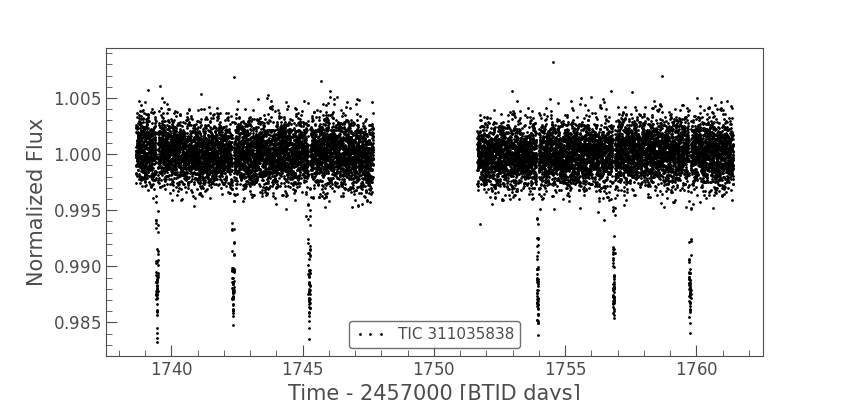

<AxesSubplot: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

In [8]:
# Stitch the different sectors together, with '.stitch()' function that normalizes the light curve as well
collect_lc = collect_lc.stitch()
collect_lc.plot(color = 'black', lw = 0, marker = '.')

In [9]:
#save the above light curve in order to use it with TLS
collect_lc.to_fits(path='tesslightcurve.fits', overwrite=True) 

In [10]:
#Read fits header
lk.io.tess.read_tess_lightcurve('tesslightcurve.fits', flux_column='pdcsap_flux', quality_bitmask='default')

time,flux,flux_err,cadenceno,mom_centr1,centroid_col,centroid_row,mom_centr2,quality
,electron / s,electron / s,,,,,,
Time,float32,float32,int32,float64,float64,float64,float64,int32
1738.6490550434278,0.9989591240882874,0.0018574430141597986,368062,1804.4260756407107,1804.4260756407107,1102.2695249987548,1102.2695249987548,0
1738.6504439170235,1.0019677877426147,0.0018602791242301464,368063,1804.4306892709062,1804.4306892709062,1102.2708968933323,1102.2708968933323,0
1738.6518327906188,1.0026003122329712,0.0018590157851576805,368064,1804.4251553329343,1804.4251553329343,1102.2695049722538,1102.2695049722538,0
1738.6532216642145,0.9999822378158569,0.0018603202188387513,368065,1804.4264487191306,1804.4264487191306,1102.2704187668573,1102.2704187668573,0
1738.6546105378093,0.9983195662498474,0.0018581910990178585,368066,1804.4278413898555,1804.4278413898555,1102.27317208198,1102.27317208198,0
1738.655999411404,1.0002391338348389,0.001862125936895609,368067,1804.4254455669393,1804.4254455669393,1102.2687582549245,1102.2687582549245,0
...,...,...,...,...,...,...,...,...
1763.3088802577222,———,———,385817,1804.4588672091961,1804.4588672091961,1102.32090547832,1102.32090547832,0


In [11]:
#Open your saved light curve
hdu = fits.open('tesslightcurve.fits')
type(hdu)
hdu.info()

Filename: tesslightcurve.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   ()      
  1  LIGHTCURVE    1 BinTableHDU     28   16719R x 7C   [D, E, E, J, D, D, J]   


In [12]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'Unofficial data product' / institution responsible for file          
DATE    = '2023-11-13'         / file creation date.                            
CREATOR = 'lightkurve.LightCurve.to_fits()' / pipeline job and program used t   
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME=  / detector type                                                      
OBJECT  = '311035838'       

In [13]:
hdu[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   40 / length of dimension 1                          
NAXIS2  =                16719 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
TTYPE1  = 'TIME    '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'btjd    '                                                            
TTYPE2  = 'FLUX    '                                                            
TFORM2  = 'E       '        

In [14]:
# Extracting the data
time = hdu[1].data['TIME']
flux = hdu[1].data['FLUX'] 
flux_err = hdu[1].data['FLUX_ERR']

time, flux, flux_err = cleaned_array(time, flux, flux_err) # remove invalid values such as nan, inf, non, negative
flux = flux / np.median(flux) # Normalising the light curve

# Run the model to the data
model = transitleastsquares(time, flux, flux_err)
#results = model.power()
#If you want to specify different parameters use the following
results = model.power(period_min=0.4, period_max=12, n_transits_min=1)


Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 37 durations
Searching 13431 data points, 2026 periods from 0.602 to 11.979 days
Using all 8 CPU threads


100%|██████████████████████████████████████████| 2026/2026 periods | 00:28<00:00


Searching for best T0 for period 2.89839 days


<IPython.core.display.Javascript object>


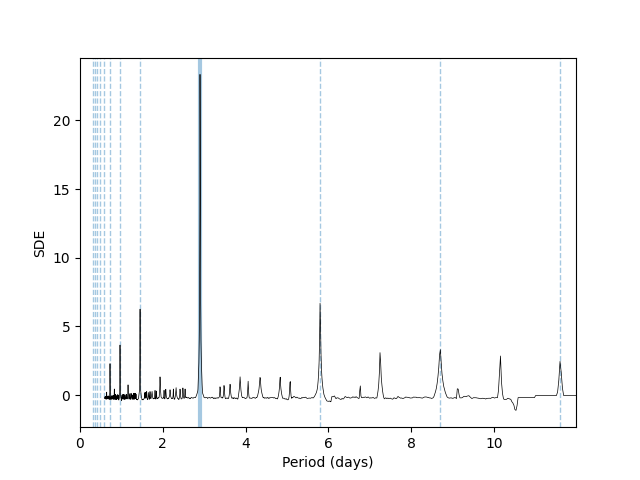

<IPython.core.display.Javascript object>


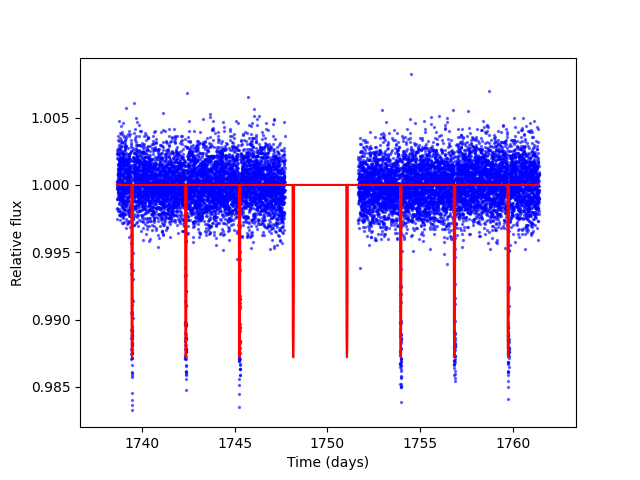

<IPython.core.display.Javascript object>


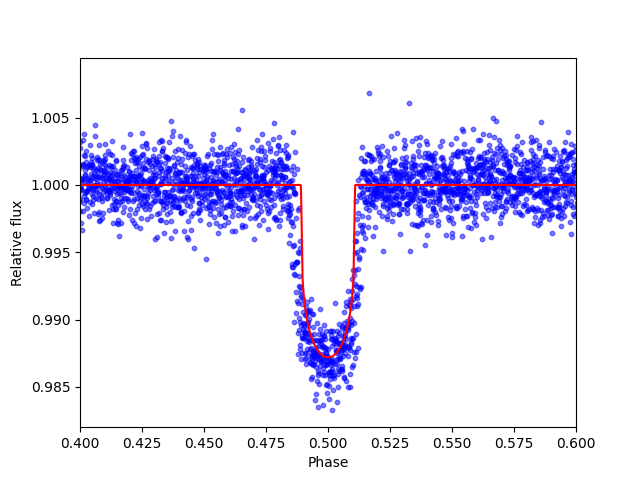

In [15]:
plt.figure()
ax = plt.gca()
ax.axvline(results.period, alpha=0.4, lw=3)
plt.xlim(np.min(results.periods), np.max(results.periods))

for n in range(2, 10):
    ax.axvline(n*results.period, alpha=0.4, lw=1, linestyle="dashed")
    ax.axvline(results.period / n, alpha=0.4, lw=1, linestyle="dashed")

# Periodogram
plt.ylabel(r'SDE')
plt.xlabel('Period (days)')
plt.plot(results.periods, results.power, color='black', lw=0.5)
plt.xlim(0, max(results.periods));

# Transit Light Curve
plt.figure()
in_transit = transit_mask(time, results.period, results.duration, results.T0)
plt.scatter(time, flux, color='blue', alpha=0.5, s=2, zorder=1)
plt.plot(results.model_lightcurve_time, results.model_lightcurve_model, color='red', zorder=1)
plt.xlim(time.min() - 2, time.max() + 2)
plt.xlabel('Time (days)')
plt.ylabel('Relative flux');

# Phase Folded Transit Light Curve
plt.figure()
plt.plot(results.model_folded_phase, results.model_folded_model, color='red', zorder = 1)
plt.scatter(results.folded_phase, results.folded_y, color='blue', s=10, alpha=0.5, zorder=0)
plt.xlim(0.4, 0.6)
plt.xlabel('Phase')
plt.ylabel('Relative flux');

In [16]:
print('Period (P) = ', format(results.period, '.10f'), 'd') 
print('Epoch Time (T0) = ', results.T0)
print('Transit duration (TD) = ', format(results.duration, '.10f'), 'd')
print('Transit duration (TD) = ', format(results.duration*24, '.10f'), 'hrs')
print('Rp/Rs = ', format(np.sqrt(1 - results.depth), '.10f'))
print('Secthresh = ', 0.1*(np.sqrt(1 - results.depth)**2))

Period (P) =  2.8983946166 d
Epoch Time (T0) =  1739.456792613374
Transit duration (TD) =  0.0576839765 d
Transit duration (TD) =  1.3844154356 hrs
Rp/Rs =  0.1131761895
Secthresh =  0.0012808849860349136
